In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn. metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# drop Unnamed column
df = df.iloc[:,1:]
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
# missing values 
print("missing: \n",df.isnull().sum())
print("-"*50)
print("duplicated: ",df.duplicated().sum())
print("-"*50)
print("info: \n",df.info())
print("-"*50)
print("describe: \n",df.describe())
print("-"*50)
df.describe(include="object")

missing: 
 airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
--------------------------------------------------
duplicated:  0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


# EDA

## 1.Bar && Pie

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


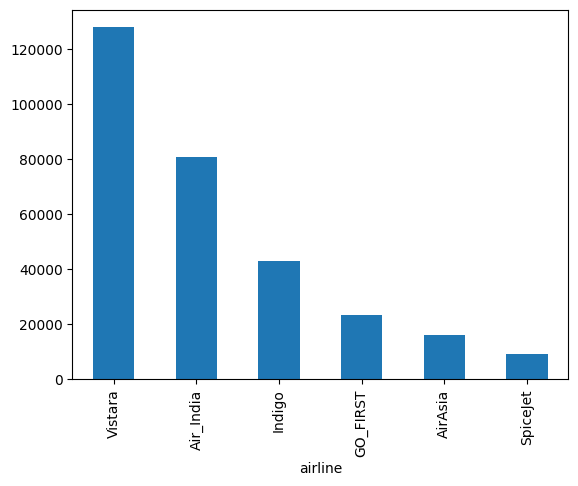

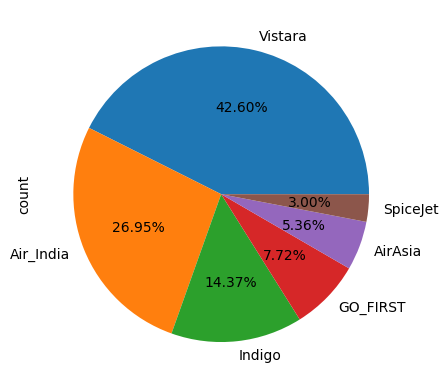

In [6]:
print(df['airline'].value_counts())
df['airline'].value_counts().plot(kind ='bar')
plt.show()
df['airline'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


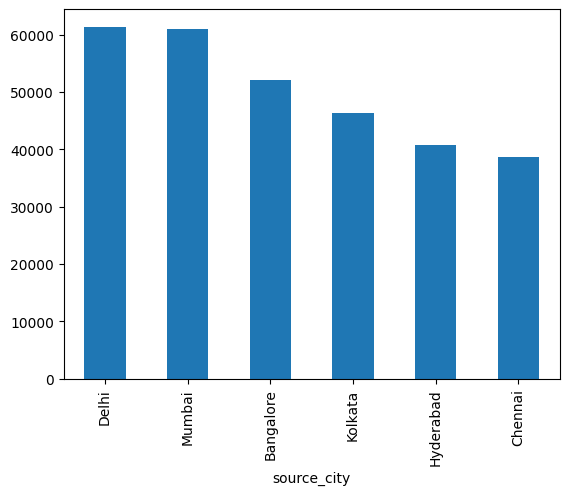

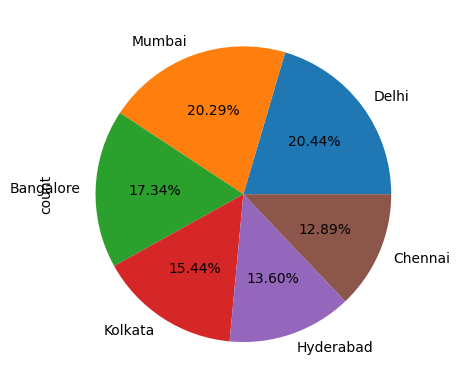

In [7]:
print(df['source_city'].value_counts())
df['source_city'].value_counts().plot(kind ='bar')
plt.show()
df['source_city'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


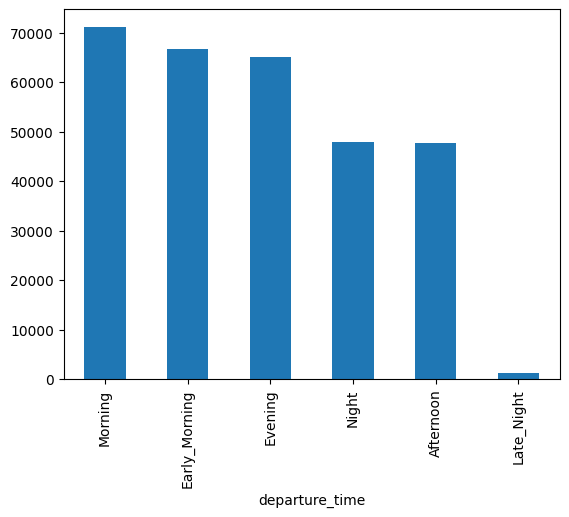

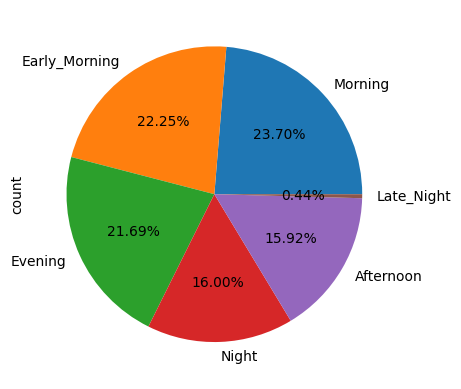

In [8]:
print(df['departure_time'].value_counts())
df['departure_time'].value_counts().plot(kind ='bar')
plt.show()
df['departure_time'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


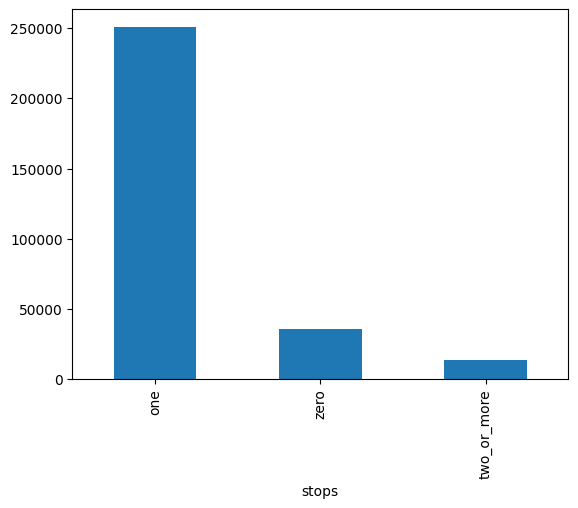

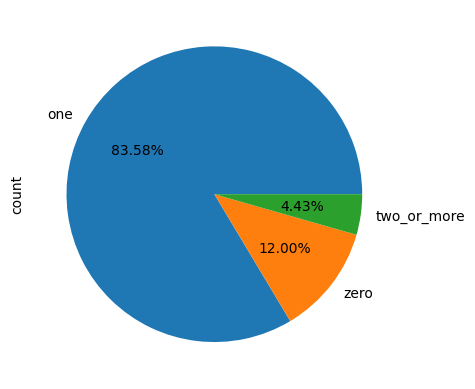

In [9]:
print(df['stops'].value_counts())
df['stops'].value_counts().plot(kind ='bar')
plt.show()
df['stops'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


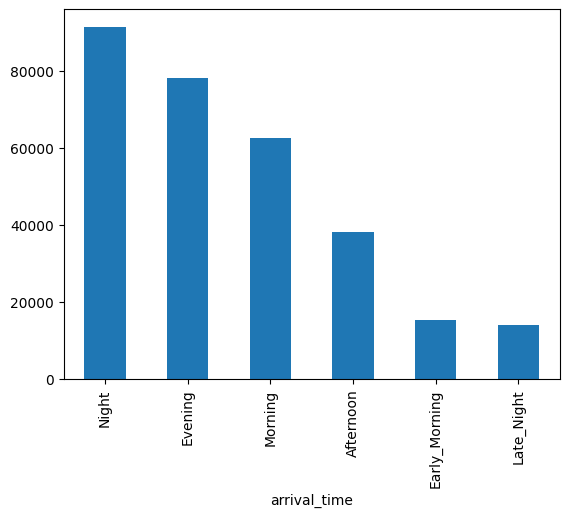

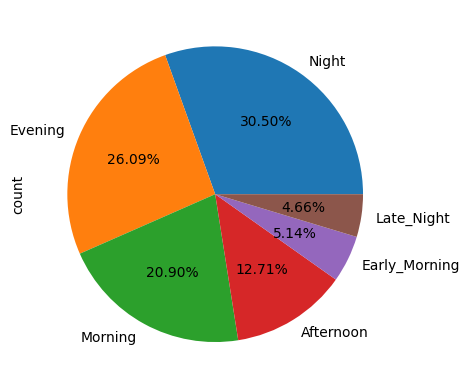

In [10]:
print(df['arrival_time'].value_counts())
df['arrival_time'].value_counts().plot(kind ='bar')
plt.show()
df['arrival_time'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


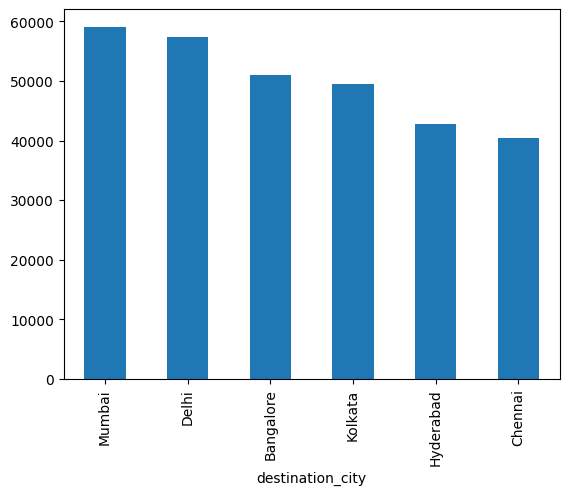

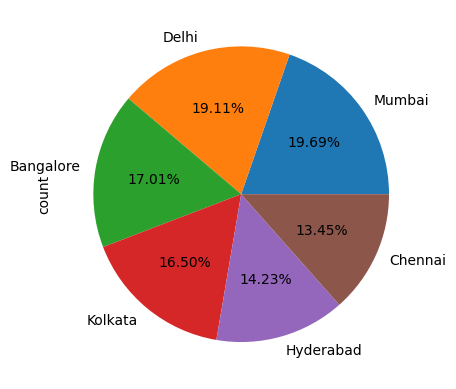

In [11]:
print(df['destination_city'].value_counts())
df['destination_city'].value_counts().plot(kind ='bar')
plt.show()
df['destination_city'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

class
Economy     206666
Business     93487
Name: count, dtype: int64


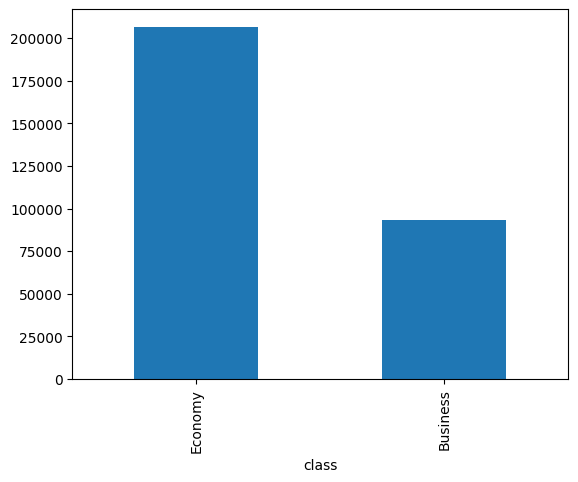

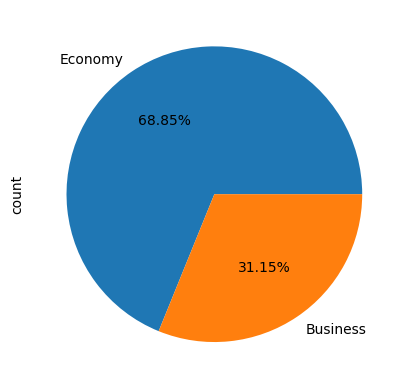

In [12]:
print(df['class'].value_counts())
df['class'].value_counts().plot(kind ='bar')
plt.show()
df['class'].value_counts().plot(kind ='pie',autopct = '%.2f%%')
plt.show()

(array([2.4734e+04, 1.3391e+04, 1.7759e+04, 2.9176e+04, 2.7102e+04,
        2.7674e+04, 2.8860e+04, 2.4630e+04, 2.3948e+04, 1.7022e+04,
        9.6010e+03, 7.7560e+03, 7.2590e+03, 1.1302e+04, 1.0836e+04,
        1.1048e+04, 4.7850e+03, 1.1600e+03, 8.7000e+02, 3.4700e+02,
        4.8300e+02, 1.6700e+02, 1.4100e+02, 5.4000e+01, 3.6000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.83      ,  2.46333333,  4.09666667,  5.73      ,  7.36333333,
         8.99666667, 10.63      , 12.26333333, 13.89666667, 15.53      ,
        17.16333333, 18.79666667, 20.43      , 22.06333333, 23.69666667,
        25.33      , 26.96333333, 28.59666667, 30.23      , 31.86333333,
        33.49666667, 35.13      , 36.76333333, 38.39666667, 40.03      ,
        41.66333333, 43.29666667, 44.93      , 46.56333333, 48.19666667,
        49.83      ]),
 <BarContainer object of 30 artists>)

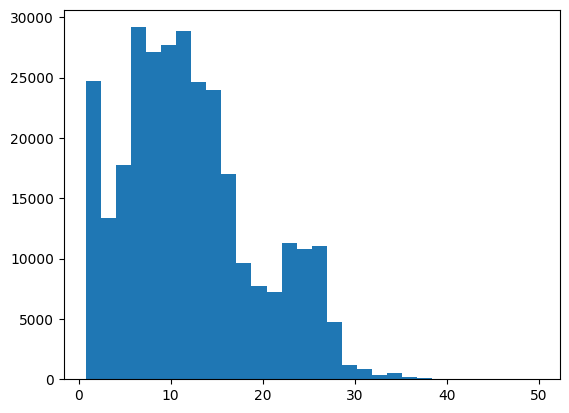

In [13]:
plt.hist(df['duration'],bins= 30)

(array([ 5953.,  9325.,  5392., 11443.,  5767., 11487., 12798.,  6404.,
        12689.,  6272., 13021., 13039.,  6479., 12895.,  6542., 13206.,
        12882.,  6397., 13035.,  6585., 12944., 12781.,  6476., 13105.,
         6531., 13022., 12908.,  6314., 12229., 12232.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6,
        36.2, 37.8, 39.4, 41. , 42.6, 44.2, 45.8, 47.4, 49. ]),
 <BarContainer object of 30 artists>)

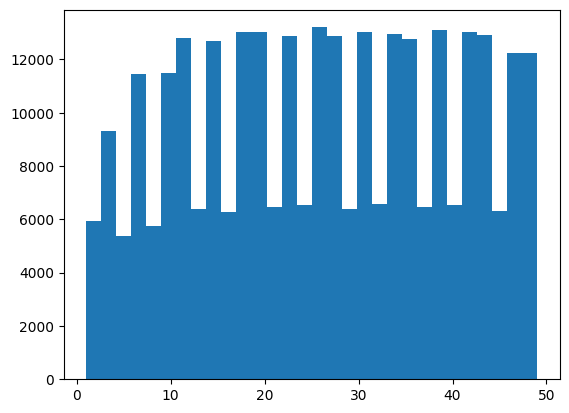

In [14]:
plt.hist(df['days_left'],bins= 30)

(array([8.6642e+04, 8.1822e+04, 2.5197e+04, 9.3240e+03, 3.8920e+03,
        3.2130e+03, 1.8890e+03, 2.9440e+03, 2.1580e+03, 6.9610e+03,
        8.6740e+03, 7.9520e+03, 1.5329e+04, 1.5000e+04, 1.2340e+04,
        5.6880e+03, 4.9230e+03, 2.0270e+03, 1.5860e+03, 1.1520e+03,
        6.5400e+02, 3.4800e+02, 2.1500e+02, 9.3000e+01, 6.9000e+01,
        3.1000e+01, 1.5000e+01, 1.1000e+01, 3.0000e+00, 1.0000e+00]),
 array([  1105.        ,   5170.53333333,   9236.06666667,  13301.6       ,
         17367.13333333,  21432.66666667,  25498.2       ,  29563.73333333,
         33629.26666667,  37694.8       ,  41760.33333333,  45825.86666667,
         49891.4       ,  53956.93333333,  58022.46666667,  62088.        ,
         66153.53333333,  70219.06666667,  74284.6       ,  78350.13333333,
         82415.66666667,  86481.2       ,  90546.73333333,  94612.26666667,
         98677.8       , 102743.33333333, 106808.86666667, 110874.4       ,
        114939.93333333, 119005.46666667, 123071.        ]

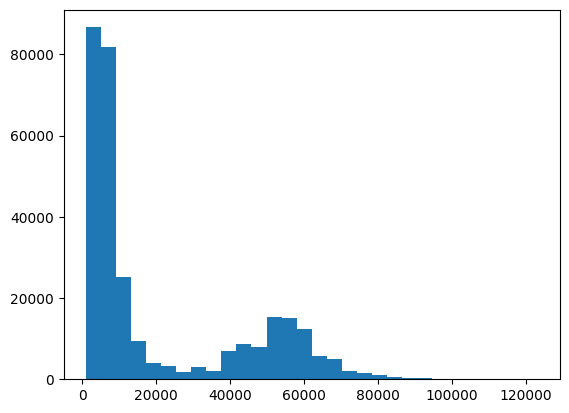

In [15]:
plt.hist(df['price'],bins= 30)

/tmp/ipykernel_13/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

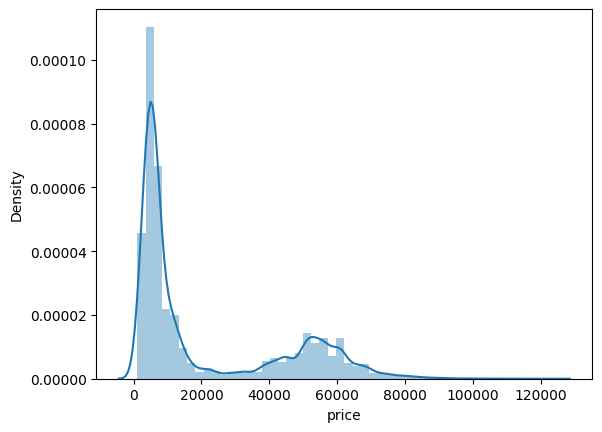

In [16]:
sns.distplot(df['price'])

<Axes: >

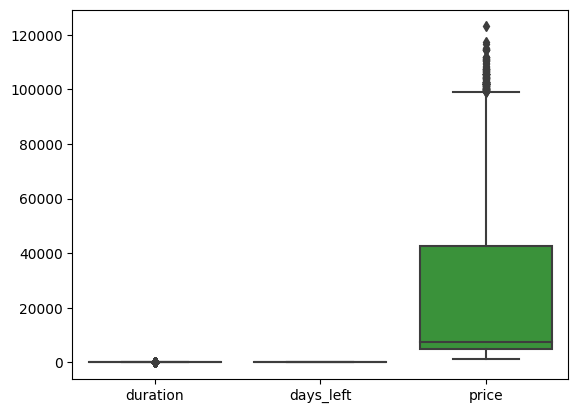

In [17]:
sns.boxplot(df)

In [18]:
df['price'].skew()

1.0613772532064343